# Simulated Annealing Algorithm 

<left><img src="image/SA.png" />



# Core Functions

In [2]:
import sys
import time
import math
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt

# generate init city sequence
def initCitySequence(cities_number):
    sequence = []
    while len(sequence) < cities_number:
        random_number = random.randint(1, cities_number)
        if random_number not in sequence:
            sequence.append(random_number)
    return sequence


def createRandomCombination(origin_sequence, swap_number):
    combination_list = []
    swap_list = getRandomSquence(swap_number, len(origin_sequence))
    permutations = list(itertools.permutations(swap_list, len(swap_list)))
    for seq in permutations:
        temp_seq = origin_sequence.copy()
        for index, element in enumerate(swap_list):
            temp_seq[element] = origin_sequence[seq[index]]
        combination_list.append(temp_seq)
    return combination_list
    

# generate a ${squence_number} numbers squence that in range of ${squence_range}
def getRandomSquence(squence_number, squence_range):
    result_squence = []
    while len(result_squence) < squence_number:
        random_number = random.randint(0, squence_range-1)
        if random_number not in result_squence:
            result_squence.append(random_number)
    result_squence.sort()
    return result_squence


# return the minimum sequnce and distance with Simulated Annealing Algorithm
def determine(combination_list, dic, tamperature):
    minimum_sequence =  combination_list[0]
    minimum_distance = evalu(combination_list[0], dic)
    
    temp_min_sequence = combination_list[1]
    temp_min_distance = evalu(combination_list[1], dic)
    for city_sequence in combination_list[2:]:
        temp_distance = evalu(city_sequence, dic)
        if temp_distance < temp_min_distance:
            temp_min_sequence = city_sequence
            temp_min_distance = temp_distance
    
    value = temp_min_distance - minimum_distance
    # 如果有找到更好的解，就回傳
    if value < 0:
        minimum_sequence = temp_min_sequence
        minimum_distance = temp_min_distance
    # 如果沒找到更好的，就根據波茲曼函數產生出的機率，決定要不要用次佳解
    else:
        r = random.random()
        if math.exp((-1)*value/tamperature) >= r:
            minimum_sequence = temp_min_sequence
            minimum_distance = temp_min_distance
        
    return minimum_sequence, minimum_distance

def evalu(seq, dic):
    dist = 0
    seq_length = len(seq)
    for i in range(seq_length):
        d = [dic[seq[i]][0]-dic[seq[(i+1)%seq_length]][0], dic[seq[i]][1]-dic[seq[(i+1)%seq_length]][1]]
        dist += distance(d)
    return dist

def distance(axis):
    return math.sqrt(axis[0]*axis[0]+axis[1]*axis[1])

def getPath(cities_seq, dic):
    x = []
    y = []
    for city in cities_seq:
        x.append(dic[city][0])
        y.append(dic[city][1])
    return x, y
    

# read the 51 cities file
def readfile():
    dic = {}
    with open('eil51.txt') as f:
        r = f.read()
        read_line = r.split('\n')               
        for i in range(len(read_line)):         
            read_element = read_line[i].split()
            dic[int(read_element[0])] = [int(read_element[1])]
            dic[int(read_element[0])].append(int(read_element[2]))
        f.close()
    return dic

# Main Function

Please enter the iteration number: 10000


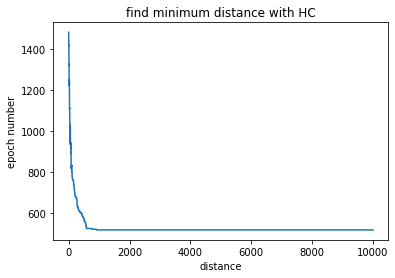

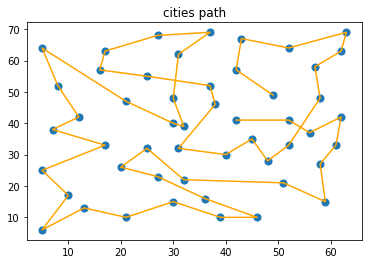


Final sequence: [11, 16, 50, 21, 34, 30, 39, 10, 37, 47, 4, 17, 15, 33, 45, 44, 42, 19, 40, 41, 13, 18, 25, 14, 24, 43, 6, 51, 46, 27, 8, 31, 26, 7, 23, 48, 1, 32, 12, 5, 38, 49, 9, 29, 20, 35, 36, 3, 28, 22, 2]
Final distance: 517.0662232612883


In [3]:
#initial   
cities_number = 51
local_min_sequence = initCitySequence(cities_number)
local_min_distance = 0

dic = readfile()

iter_num = input('Please enter the iteration number:')
iter_num = int(iter_num)


epcho_list = []
distance_list = []
tamperature = 1000.0

for i in range(iter_num):
    different_combination_list = createRandomCombination(local_min_sequence, 4)
    local_min_sequence, local_min_distance= determine(different_combination_list, dic, tamperature)
    tamperature = tamperature * 0.95
    
    epcho_list.append(i)
    distance_list.append(local_min_distance)

#Output
plt.xlabel('distance')
plt.ylabel('epoch number')
plt.title('find minimum distance with HC')
plt.plot(epcho_list, distance_list)


plt.figure()
plt.title('cities path')
x, y = getPath(local_min_sequence, dic) 
plt.scatter(x, y, s=50)
plt.plot(x, y, 'orange')

plt.show()

print('\nFinal sequence:',local_min_sequence)
print('Final distance:',local_min_distance)